In [2]:
#1. Explain the role of activation functions in neural networks. Compare and contrast linear and nonlinear activation functions. Why are nonlinear activation functions preferred in hidden layers
#Ans: Activation functions introduce non-linearity into a neural network, enabling it to learn and model complex relationships between input and output data. Their primary roles are:

#Introduce Non-Linearity: They allow the network to capture non-linear patterns, which are essential for solving complex problems.
#Control Output Range: Some activation functions constrain outputs to a specific range (e.g., [0,1][−1,1]), making the model stable and suitable for certain tasks.
#Enable Layer Communication: Activation functions decide whether a neuron should be activated (i.e., pass information to the next layer).

#Linear Activation Functions:
#A linear activation function has the form: f(x) = ax + b.
#Linear Relationship: The output is a scaled and shifted version of the input, maintaining proportionality.
#No Non-Linearity: Linear activation functions cannot model or represent non-linear relationships between inputs and outputs.
#Stacking Problem: Multiple layers of neurons with linear activation are mathematically equivalent to a single layer.

#Nonlinear Activation Functions:
#A nonlinear activation function introduces non-linearity in the relationship between inputs and outputs. Examples include ReLU, sigmoid, and tanh.
#Non-Linear Relationship: The output is not directly proportional to the input, enabling the network to capture complex, non-linear patterns in data.
#Stacking Layers: Nonlinearity allows stacking multiple layers to increase the model's representational power. Each layer learns a new feature representation.
#Universal Approximation: Neural networks with nonlinear activations can approximate any continuous function, given sufficient neurons and layers.
#Use Case: Essential in hidden layers to learn hierarchical patterns and non-linear mappings.

In [3]:
#2. Describe the Sigmoid activation function. What are its characteristics, and in what type of layers is it commonly used? Explain the Rectified Linear Unit (ReLU) activation function. Discuss its advantages and potential challenges.What is the purpose of the Tanh activation function? How does it differ from the Sigmoid activation function
#Ans: The sigmoid function is defined as: f(x) = 1/1+e^(-x)
#It produces an S-shaped curve, with output values ranging between 0 and 1

#Characteristics:
#Range: The output lies in the interval [0, 1]
#Monotonic: The function is strictly increasing, meaning larger inputs always yield larger outputs.
#Vanishing Gradient: For very large positive or negative inputs, the gradient approaches zero, slowing down learning in deep networks.
#Probabilistic Interpretation: Often used when outputs need to represent probabilities (e.g., binary classification).
#Common Usage: Output Layers in Binary Classification Tasks: The sigmoid function maps outputs to probabilities, making it suitable for models using cross-entropy loss.

#Rectified Linear Unit (ReLU) Activation Function:
#The ReLU function is defined as: f(x)=max(0,x). This means the output is 0 for all x < 0 x < 0 and x for x≥0.
#Advantages:
#Simplicity: Easy to compute and implement.
#Efficient Gradient Propagation: For x > 0, the gradient is 1, avoiding the vanishing gradient problem.
#Sparse Activation: Many neurons output 0, making the network sparse and computationally efficient.
#Challenges:
#Dead Neurons: Neurons with x <0 output 0 and have no gradient, meaning they can stop updating during training.
#Unbounded Output: No constraints on the output, which can sometimes cause instability during training.
#Common Usage:
#Hidden Layers: ReLU is widely used in hidden layers of deep neural networks due to its simplicity and effectiveness in training deep architectures.

#Tanh Activation Function:
#The output of the tanh function lies in the range [−1,1].

#Characteristics:
#Range: Outputs values between −1 and 1, making it zero-centered.
#Smoother Gradient: Compared to sigmoid, the tanh function has steeper gradients near 0, which can aid learning.
#Vanishing Gradient Problem: Similar to sigmoid, tanh suffers from vanishing gradients for large positive or negative inputs.

#Common Usage:
#Hidden Layers in Shallow Networks: Tanh is preferred when data has a mean close to zero since it centers outputs around 0.

In [4]:
#3. Discuss the significance of activation functions in the hidden layers of a neural network.
#Ans: Activation functions in the hidden layers of a neural network are crucial because they enable the network to learn complex patterns and make accurate predictions. Without activation functions, a neural network would essentially become a linear model, incapable of solving complex tasks.

#Introduction of Non-Linearity:
#Why It's Important:
#Real-world problems often involve non-linear relationships between input features and the target outputs. For example, recognizing objects in images or understanding natural language cannot be represented with simple linear mappings.
#Activation functions introduce non-linearity, enabling the network to learn these relationships.

#What Happens Without Non-Linearity:
#A network with only linear transformations (e.g., no activation functions) would collapse into a single linear transformation, regardless of its depth, losing the advantage of multiple layers.

In [5]:
#4. Explain the choice of activation functions for different types of problems (e.g., classification, regression) in the output layer.
#Ans: The choice of activation function for the output layer in a neural network depends on the type of problem and the desired range and interpretation of the output.

#Classification Problems:
#Classification tasks involve predicting discrete categories (e.g., spam vs. not spam, or dog vs. cat). The choice of activation depends on the number of classes:

#a. Binary Classification:
#we use Activation Function: Sigmoid.because, The sigmoid function outputs values in the range [0,1], making it ideal for modeling probabilities.

#Multi-Class Classification (Single Label):
#The softmax function transforms raw outputs (logits) into probabilities for each class, with the sum of all probabilities equal to 1.
#It is suitable for problems where each instance belongs to exactly one class.

#c. Multi-Class Classification (Multi-Label):
#Activation Function: Sigmoid (applied to each output neuron) because, Sigmoid allows each output neuron to independently predict the probability of its corresponding class, as multiple classes can be true simultaneously.
#Common Loss Function: Binary Cross-Entropy (applied to each output independently)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with relu activation...
Training model with sigmoid activation...
Training model with tanh activation...


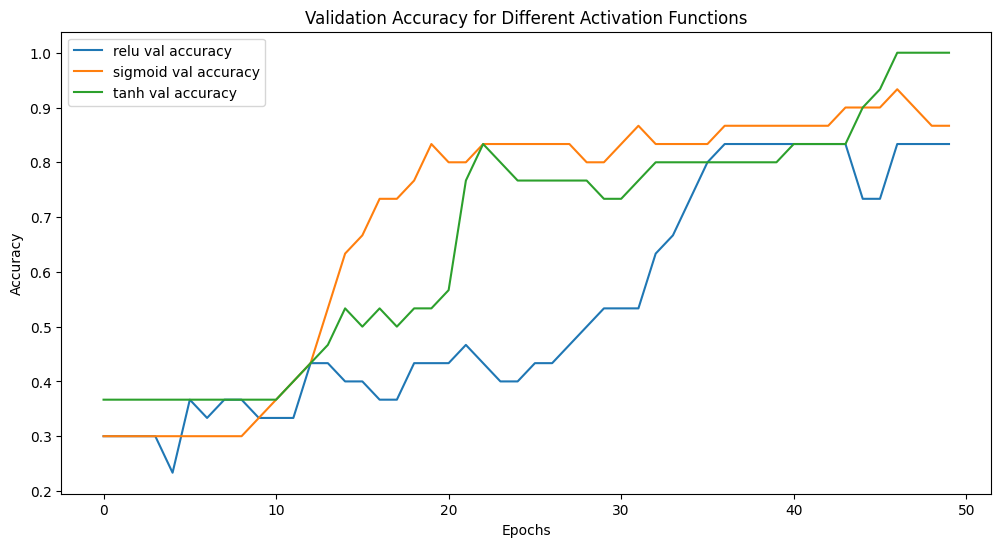

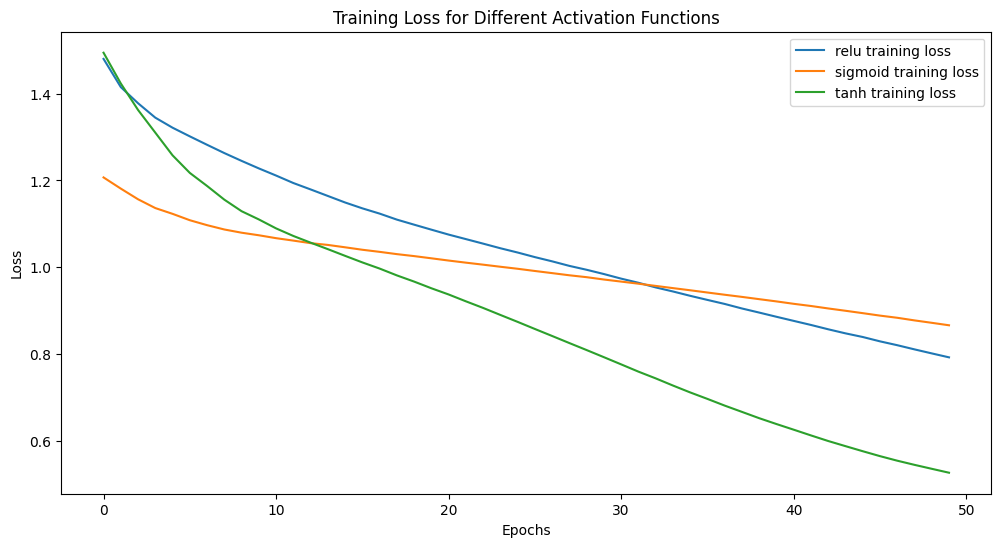

In [6]:
#5. Experiment with different activation functions (e.g., ReLU, Sigmoid, Tanh) in a simple neural network architecture. Compare their effects on convergence and performance
#Ans: To experiment with different activation functions, we can build a simple neural network for a classification or regression task and compare the effects of ReLU, Sigmoid, and Tanh activation functions on training convergence and performance. Let's perform an example experiment using the popular Iris dataset for classification.

#Experiment Setup
#Dataset: Iris dataset (3 classes of flowers, 4 input features).
#Neural Network Architecture:
#Input layer: 4 neurons (features of the Iris dataset).
#Hidden layer: 1 layer with 16 neurons.
#Output layer: 3 neurons (one for each class, with softmax activation).
#Activation Functions to Compare: ReLU, Sigmoid, Tanh (used in the hidden layer).
#Loss Function: Categorical Cross-Entropy.
#Optimizer: Adam (learning rate: 0.001).
#Evaluation Metric: Accuracy on test data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load and preprocess the dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Function to build the model
def build_model(activation_function):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation=activation_function, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(3, activation="softmax")
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']
history_dict = {}

for activation in activation_functions:
    model = build_model(activation)
    print(f"Training model with {activation} activation...")
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    history_dict[activation] = history

# Plot the results
plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(history_dict[activation].history['val_accuracy'], label=f'{activation} val accuracy')
plt.title('Validation Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(history_dict[activation].history['loss'], label=f'{activation} training loss')
plt.title('Training Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()